In [1]:
def fluid_properties(mud_flow_rate, gas_flow, mud_density, hole_diameter, tubing_OD, gasgrav,  pressure, temp):
    # calculate gas compressibility factor
    z_gas=Calc_Z(gasgrav, pressure, temp)
    # z_gas = 0.95 (commented out in VBA code)
    
    # calculate gas density and viscosity
    density_gas, visc_gas = Calc_gas_density_visc(gasgrav, pressure, temp, z_gas)
    
    # calculate liquid rate in ft^3 per second
    liquid_rate = mud_flow_rate / 7.48052 / 60
    
    
    # calculate gas rate in scf/sec
    gas_rate = (gas_flow * 1000) / 86400
    
    # calculate annulus area
    Area = (3.141592654 / 4) * ((hole_diameter / 12) ** 2 - (tubing_OD / 12) ** 2)
    
    # calculate vsg
    vsg = (gas_rate / Area) * (14.7 / 520) * (temp + 460) * (z_gas / pressure)
    
    # calculate vsl
    vsl = (0.408 * mud_flow_rate) / (hole_diameter ** 2 - tubing_OD ** 2)
    vsl = liquid_rate / Area
    

    return vsg, vsl,density_gas,visc_gas
def Calc_Z(gasgrav, pressure, temp):
    # calculate gas properties: Z
    Tpc = 168 + (325 * gasgrav) - (12.5 * (gasgrav ** 2))
    Ppc = 677 + (15 * gasgrav) - (35.7 * (gasgrav ** 2))
    Tpr = (temp + 460) / Tpc
    Ppr = pressure / Ppc
    A1 = 0.3265
    A2 = -1.07
    A3 = -0.5339
    A4 = 0.01569
    A5 = -0.05165
    A6 = 0.5475
    A7 = -0.7361
    A8 = 0.1844
    A9 = 0.1056
    A10 = 0.6134
    A11 = 0.721
    S1 = A1 + (A2 / Tpr) + (A3 / (Tpr ** 3)) + (A4 / (Tpr ** 4)) + (A5 / (Tpr ** 5))
    S2 = (A6 + (A7 / Tpr) + (A8 / (Tpr ** 2)))
    S3 = A9 * ((A7 / Tpr) + (A8 / (Tpr ** 2)))
    z_gas = 1
    for j in range(1, 21):
        rowpr = (0.27 * (Ppr / (z_gas * Tpr)))
        z_gas = 1 + (S1 * (rowpr)) + (S2 * (rowpr) ** 2) - (S3 * ((rowpr) ** 5)) + (A10 * (1 + (A11 * ((rowpr) ** 2))) * (((rowpr) ** 2) / (Tpr ** 3)) * math.exp((-A11) * ((rowpr) ** 2)))
    return z_gas
def VUB(ID,den_liquid,den_gas,VM, OD):
    R=ID/OD
    k1=0.345-0.037*R+0.235*R**2-0.134*R**3
    k2= 0.2-0.041*R+0.01*R**2-0.033*R**3
    V=k1*np.sqrt(ID*(den_liquid-den_gas)/den_liquid) +(1+k2)*VM
    return V
def VLB(ID,VM, OD):
    R=ID/OD
    k2= 0.2-0.041*R+0.01*R**2-0.033*R**3
    V=(1+k2)*VM
    return V
def A(T,Z,gasgrav):
    A1=28.96*gasgrav/Z/(T)/10.73/144
    return A1
def Calc_gas_density_visc(gasgrav, pressure, temp, z_gas):
    # calc gas density
    density_gas = (28.97 * gasgrav * pressure) / (10.732 * z_gas * (temp + 460))
    
    # calc gas viscosity
    Ma = 28.97 * gasgrav
    aaa = ((9.37 + (0.01607 * Ma)) * ((temp + 460) ** 1.5)) / (209.2 + (19.26 * Ma) + (temp + 460))
    bbb = 3.448 + (986.4 / (temp + 460)) + (0.01009 * Ma)
    ccc = 2.447 - (0.2224 * bbb)
    visc_gas = aaa * (10 ** (-4)) * math.exp(bbb * ((density_gas / 62.4) ** ccc))
    
    return density_gas, visc_gas

In [2]:
import math
import numpy as np
import matplotlib.pyplot as plt

0.0
1.7030461920066406
3.4060923840132813
5.109138576019922
6.812184768026563
8.515230960033204
10.218277152039844
11.921323344046485
13.624369536053125
15.327415728059766
17.030461920066408
18.73350811207305
20.436554304079692
22.139600496086334
23.842646688092977
25.54569288009962
27.24873907210626
28.951785264112903
30.654831456119545
32.357877648126184
34.06092384013282
35.76397003213946
37.4670162241461
39.17006241615274
40.87310860815938
42.576154800166016
44.279200992172655
45.98224718417929
47.68529337618593
49.38833956819257
51.09138576019921
52.79443195220585
54.49747814421249
56.200524336219125
57.903570528225764
59.6066167202324
61.30966291223904
63.01270910424568
64.71575529625233
66.41880148825896
68.1218476802656
69.82489387227224
71.52794006427888
73.23098625628552
74.93403244829216
76.6370786402988
78.34012483230543
80.04317102431207
81.74621721631871
83.44926340832535
85.15230960033199
86.85535579233863
88.55840198434527
90.2614481763519
91.96449436835854
93.667540560

Text(0.5, 0, 'Time (s)')

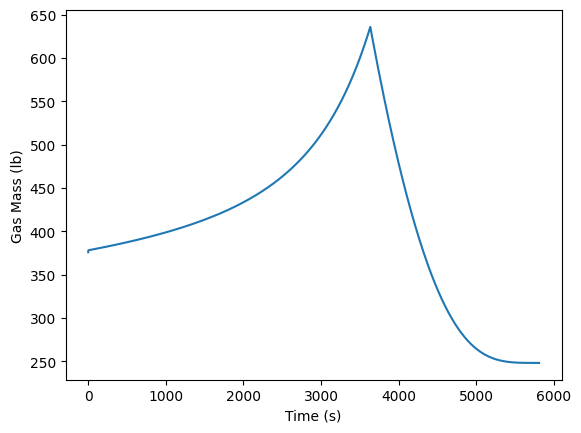

In [23]:
HUB=0
LK1=0
open_hole_diameter = 9
od_drill_pipe = 5
OD_drill_collar =6
ID_Casing=8.5
mud_density = 12
density_liquid = 89
r100= 20
r3=3
gasgrav=0.65
temp = 250
mud_flow_rate = 200
Pressure=[]
Pi=6500
Kick_Volume=40
gas_flow = 1000
timebeforecirculation=1
Drill_collar_length=800
AC=((open_hole_diameter/12)**2-(od_drill_pipe/12)**2)/4*3.14
AC2=((open_hole_diameter/12)**2-(OD_drill_collar/12)**2)/4*3.14
V1 = AC2*Drill_collar_length
if Kick_Volume*5.615>V1:
    LK1= (Kick_Volume*5.615-V1)/AC + Drill_collar_length
else:
    LK1=Kick_Volume*5.615/AC2
XG1= 0.7
XL1=1-XG1

Z=Calc_Z(0.65,Pi,560)
A1=A(560,Z,0.65)

Pave=-1/XG1/A1/LK1*(Pi+XL1*mud_density*0.052/XG1/A1)*(np.exp((-XG1*A1*LK1))-1)-(XL1*mud_density*0.052/XG1/A1)

gasden=Pave*A1/0.052
gasden1=gasden
vsg, vsl,density_gas,visc_gas= fluid_properties(mud_flow_rate, gas_flow, mud_density, open_hole_diameter, od_drill_pipe, gasgrav,  Pave, temp)

V1 = VUB(od_drill_pipe,density_liquid/8.4,gasden,0,open_hole_diameter)
V2= VLB(od_drill_pipe,0,open_hole_diameter)
Weight = gasden*7.48*Kick_Volume*5.615
HUB=LK1 + V1*timebeforecirculation
HLB=V2*timebeforecirculation
LK1=HUB-HLB
W2=[]
i=0
n2 = 0.657 * math.log10(r100 / r3)
k2 = (5.11 * r100) / (170.2 ** n2)
a=(np.log(n2)+3.93)/50
b=(1.75-np.log(n2))/7
Pb=Pi-HLB*mud_density*0.052
casing_shoe=5000
density_liquid = 90
Pave=Pb
visc_L=100*k2*(144*vsl/(open_hole_diameter-od_drill_pipe))**(n2-1)*((2*n2+1)/3/n2)**n2
while (HUB)<10000 and i<1000000:
    print (HLB)

    if HUB <Drill_collar_length:
        OD2,OD1=OD_drill_collar 
    else:
        OD1=od_drill_pipe

    if HLB<Drill_collar_length:
        OD2=OD_drill_collar 
 
    else:
        OD2=od_drill_pipe
            

    if HUB > casing_shoe:
        ID1=ID_Casing
    else:
        ID1=open_hole_diameter

    if HLB > casing_shoe:
        ID2=ID_Casing
    else:
        ID2=open_hole_diameter
    i+=1

    vsg, vsl,density_gas,visc_gas= fluid_properties(mud_flow_rate, gas_flow, mud_density, open_hole_diameter, od_drill_pipe, gasgrav,  Pave, temp)
   
    V1 = VUB(OD1,mud_density,gasden,vsl,ID1)
    
    V2= VLB(OD2,vsl,ID2)

    HUB=HUB + V1*timebeforecirculation
    HLB=HLB+V2*timebeforecirculation
    NKL=(HUB-HLB)
   

    H=Weight/density_gas
    XG1=H/NKL
    
  
    W2.append(Weight)
    if XG1>=1:
        XG1=0.99
    XL1=1-XG1

    Z=Calc_Z(0.65,Pave,560)
    A1=A(temp+460,Z,0.65)
    
    
    VL=vsl/XL1
    RE=928*VL*(8.5-5)*density_liquid/visc_L
    f=a/RE**b
    RE2=928*vsl*(8.5-5)*density_liquid/visc_L
    f2=a/RE2**b
    Fric=f*VL**2*mud_density/25.81/(8.5-5)
    Fric2=f2*vsl**2*mud_density/25.81/(8.5-5)
    Pave=-1/XG1/A1/NKL*(Pb+(XL1*mud_density*0.052+Fric)/XG1/A1)*(np.exp((-XG1*A1*NKL))-1)-((XL1*mud_density*0.052+Fric)/XG1/A1)
    temp = 250-2/100*HLB
    if Pave <0:
        break
    gasden=A1*Pave/0.052
    Pb=Pi-HLB*mud_density*0.052-HLB*Fric2
    dp=(mud_density*0.052*XL1+XG1*A1*Pave+Fric)*NKL

    RE3=928*V1*(8.5-5)*density_liquid/visc_L
    f3=a/RE3**b
    Fric3=f3*V1**2*mud_density/25.81/(8.5-5)

    PS=Pb-dp-(10000-HUB)*mud_density*0.052-(10000-HUB)*Fric3
    Pressure.append(PS)


while (HLB<10000):
    vsg, vsl,density_gas,visc_gas= fluid_properties(mud_flow_rate, gas_flow, mud_density, open_hole_diameter, od_drill_pipe, gasgrav,  Pave, temp)
    W=V1*XG1*gasden*7.48/AC*timebeforecirculation
    
    gasden=gasden*(Weight-W)/Weight
   
    Weight=Weight-W
    V1 = VUB(OD1,mud_density,gasden,vsl,ID1)
    
    V2= VLB(OD2,vsl,ID2)
    
    HUB=10000
    HLB=HLB+V2*timebeforecirculation
    NKL=(HUB-HLB)
 
    H=Weight/density_gas
    XG1=H/NKL
    i+=1
  
    W2.append(Weight)
    if XG1>=1:
        XG1=0.99
    XL1=1-XG1
    if XG1>=1:
        XG1=0.99
    XL1=1-XG1

    Z=Calc_Z(0.65,Pave,560)
    A1=A(temp+460,Z,0.65)
    
  
    VL=vsl/XL1
    RE=928*VL*(8.5-5)*density_liquid/visc_L
    f=a/RE**b
    RE2=928*vsl*(8.5-5)*density_liquid/visc_L
    f2=a/RE2**b
    Fric2=f2*vsl**2*mud_density/25.81/(8.5-5)
    
    Fric=f*VL**2*mud_density/25.81/(8.5-5)

    Pave=-1/XG1/A1/NKL*(Pb+(XL1*mud_density*0.052+Fric)/XG1/A1)*(np.exp((-XG1*A1*NKL))-1)-((XL1*mud_density*0.052+Fric)/XG1/A1)

    if Pave <0:
        break
    gasden=A1*Pave/0.052
    Pb=Pi-HLB*mud_density*0.052-HLB*Fric2
    dp=(mud_density*0.052*XL1+XG1*A1*Pave+Fric)*NKL
    PS=Pb-dp
    Pressure.append(PS)


plt.plot(np.arange(i-1),Pressure)
# plt.plot(np.arange(i),W2,2)
plt.ylabel('Gas Mass (lb)')
plt.xlabel('Time (s)')

In [4]:
a	=0.07485
b	=0.27681
vsl2 = (0.408 * mud_flow_rate) / 4.276**2
RE=928*vsl2*(4.276)*density_liquid/visc_L
f=a/RE**b
Fric4=f*vsl2**2*mud_density/25.81/(8.5-5)

In [5]:
pd.DataFrame(Pressure).to_csv('C:/Users/17012/Desktop/PhD TAMU/Drilling Engineering/T.csv')

NameError: name 'pd' is not defined

In [7]:
import tkinter as tk


In [8]:
root = tk.Tk()
root.geometry('800x500')
root.title("Gas Kick Simulator")
label = tk.Label(root,text="Texas A&M PETE 661 Gas Kick Simulator", font =('Arial', 18))
label.pack(padx= 20, pady=20)
myentry=tk.Entry(root)
myentry.pack(padx=20)
button = tk.Button(root, text= "Run Simulation", font=('Arial',18))
button.pack()
root.mainloop()

In [9]:
root = tk.Tk()
root.geometry('800x500')
root.title("Gas Kick Simulator")
label = tk.Label(root,text="Texas A&M PETE 661 Gas Kick Simulator", font =('Arial', 18))
label.pack(padx= 20, pady=20)
myentry=tk.Entry(root)
myentry.pack(padx=20)
buttonframe=tk.Frame(root)
buttonframe.columnconfigure(0,weight=1)
buttonframe.columnconfigure(1,weight=1)
buttonframe.columnconfigure(2,weight=1)
btn1=tk.Button(buttonframe,text='1')
btn1.grid(row=0,column=0,sticky=tk.W+tk.E)
btn2=tk.Button(buttonframe,text='1')
btn2.grid(row=0,column=1,sticky=tk.W+tk.E)
btn3=tk.Button(buttonframe,text='1')
btn3.grid(row=0,column=2,sticky=tk.W+tk.E)
btn4=tk.Button(buttonframe,text='1')
btn4.grid(row=1,column=0,sticky=tk.W+tk.E)
btn5=tk.Button(buttonframe,text='1')
btn5.grid(row=1,column=1,sticky=tk.W+tk.E)
btn6=tk.Button(buttonframe,text='1')
btn6.grid(row=1,column=2,sticky=tk.W+tk.E)
buttonframe.pack(fill='x')
root.mainloop()

In [10]:
import tkinter as tk
from tkinter import ttk

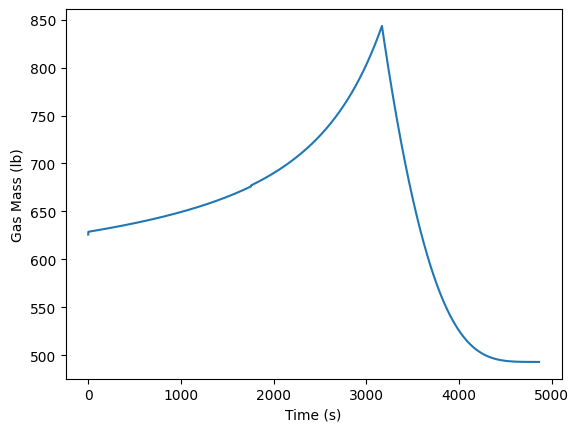

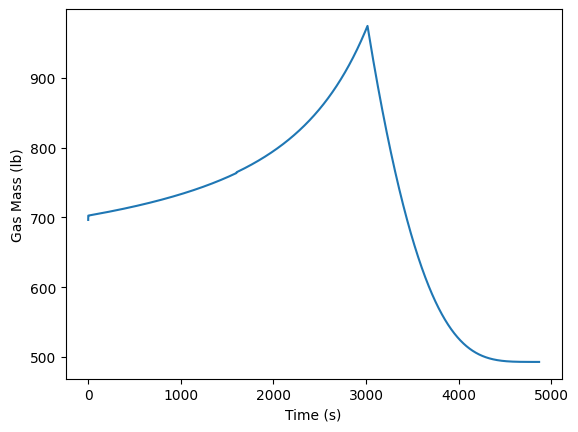

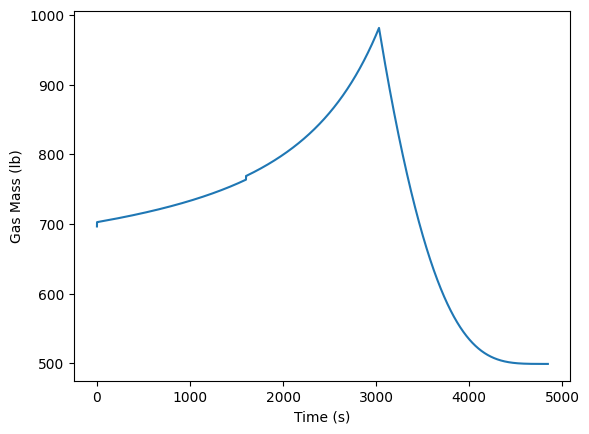

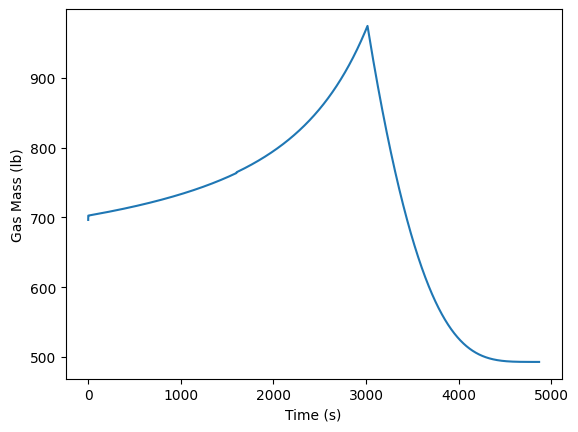

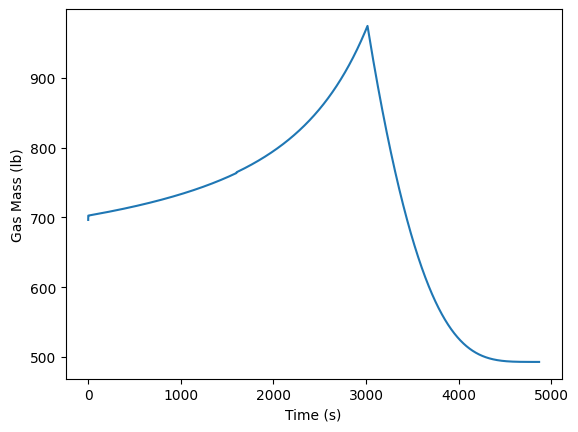

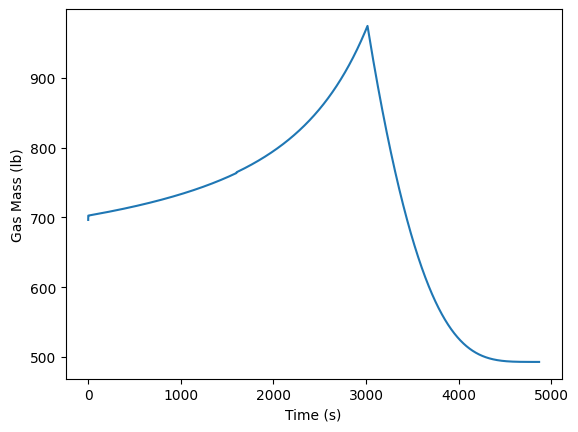

In [51]:
window = tk.Tk()
window.title('Gas Kick Simulator')
frame = tk.Frame(window)
frame.pack()

Mud_and_pumping_properties=tk.LabelFrame(frame,text='Mud and Pumping Properties')
Mud_and_pumping_properties.grid(row=0,column=0,padx=20,pady=20)

mud_density = tk.Label(Mud_and_pumping_properties,text='Mud Density (ppg)')
mud_density.grid(row=0,column=0)

Mud_rate = tk.Label(Mud_and_pumping_properties,text='Mud injection Rate (gpm)')
Mud_rate.grid(row=0, column=1)

Mud_density_entry = tk.Entry(Mud_and_pumping_properties)
Mud_density_entry.grid(row=1,column=0)
Mud_rate_entry = tk.Entry(Mud_and_pumping_properties)
Mud_rate_entry.grid(row=1,column=1)

r100= tk.Label(Mud_and_pumping_properties,text="R 100")
r100_entry = tk.Entry(Mud_and_pumping_properties)
r100.grid(row=2,column=1)
r100_entry.grid(row=3,column=1)

r300= tk.Label(Mud_and_pumping_properties,text="R 300")
r300_entry = tk.Entry(Mud_and_pumping_properties)
r300.grid(row=2,column=0)
r300_entry.grid(row=3,column=0)

r3= tk.Label(Mud_and_pumping_properties,text="R 3")
r3_entry = tk.Entry(Mud_and_pumping_properties)
r3.grid(row=2,column=2)
r3_entry.grid(row=3,column=2)

r600= tk.Label(Mud_and_pumping_properties,text="R 600")
r600_entry = tk.Entry(Mud_and_pumping_properties)
r600.grid(row=0,column=2)
r600_entry.grid(row=1,column=2)



Casing_properties=tk.LabelFrame(frame,text='Casing and Drill Bit Size')
Casing_properties.grid(row=1,column=0,padx=20,pady=20)
Casing_size= tk.Label(Casing_properties,text="Casing ID (in)")
Casing_size_entry = tk.Entry(Casing_properties)
Casing_size.grid(row=0,column=0)
Casing_size_entry.grid(row=1,column=0)


bit_size= tk.Label(Casing_properties,text="Bit Size (in)")
bit_size_entry = tk.Entry(Casing_properties)
bit_size.grid(row=0,column=1)
bit_size_entry.grid(row=1,column=1)

DP_ID= tk.Label(Casing_properties,text="Drill Pipe ID (in)")
DP_ID_entry = tk.Entry(Casing_properties)
DP_ID.grid(row=0,column=2)
DP_ID_entry.grid(row=1,column=2)

DP_OD= tk.Label(Casing_properties,text="Drill Pipe OD (in)")
DP_OD_entry = tk.Entry(Casing_properties)
DP_OD.grid(row=2,column=0)
DP_OD_entry.grid(row=3,column=0)

DC_OD= tk.Label(Casing_properties,text="Drill Collar OD (in)")
DC_OD_entry = tk.Entry(Casing_properties)
DC_OD.grid(row=2,column=2)
DC_OD_entry.grid(row=3,column=2)

DC_ID= tk.Label(Casing_properties,text="Drill Collar ID (in)")
DC_ID_entry = tk.Entry(Casing_properties)
DC_ID.grid(row=2,column=1)
DC_ID_entry.grid(row=3,column=1)

Casing_shoe= tk.Label(Casing_properties,text="Casing Shoe Depth (ft)")
Casing_shoe_entry = tk.Entry(Casing_properties)
Casing_shoe.grid(row=4,column=1)
Casing_shoe_entry.grid(row=5,column=1)

Well_depth= tk.Label(Casing_properties,text="Well Depth (ft)")
Well_depth_entry = tk.Entry(Casing_properties)
Well_depth.grid(row=4,column=0)
Well_depth_entry.grid(row=5,column=0)

DC_length= tk.Label(Casing_properties,text="Drill Collar Length (ft)")
DC_length_entry = tk.Entry(Casing_properties)
DC_length.grid(row=4,column=2)
DC_length_entry.grid(row=5,column=2)




nozzle= tk.Label(Casing_properties,text="Nozzle Size")
nozzle_entry = tk.Entry(Casing_properties)
nozzle.grid(row=6,column=1)
nozzle_entry.grid(row=7,column=1)

Kick_press=tk.LabelFrame(frame,text='Kick and Pressure Data')
Kick_press.grid(row=3,column=0,padx=20,pady=20)

KV= tk.Label(Kick_press,text="Kick Volume (bbl)")
KV_entry = tk.Entry(Kick_press)
KV.grid(row=0,column=0)
KV_entry.grid(row=1,column=0)

SIDPP= tk.Label(Kick_press,text="SIDPP (psi)")
SIDPP_entry = tk.Entry(Kick_press)
SIDPP.grid(row=0,column=1)
SIDPP_entry.grid(row=1,column=1)




for widget in Mud_and_pumping_properties.winfo_children():
    widget.grid_configure(padx=10, pady= 5)

for widget in Casing_properties.winfo_children():
    widget.grid_configure(padx=10, pady= 5)

for widget in Kick_press.winfo_children():
    widget.grid_configure(padx=10, pady= 5)

button = tk.Button(frame, text='Run Simulation',command=func)
button.grid(row=4,column=0, sticky='news',padx=20,pady=10)

window.mainloop()

In [50]:
def func():
    
    
    HUB=0
    LK1=0
    open_hole_diameter = float(bit_size_entry.get())
    od_drill_pipe = float(DP_OD_entry.get())
    OD_drill_collar = float(DC_OD_entry.get())
    ID_Casing=float(Casing_size_entry.get())
    mud_density = float(Mud_density_entry.get())
    density_liquid = mud_density * 7.48
    r100= float(r100_entry.get())
    r3= float(r3_entry.get())
    gasgrav=0.65
    temp = 250
    mud_flow_rate = float(Mud_rate_entry.get())
    Pressure=[]
    WD = float(Well_depth_entry.get())
    Pi= float(SIDPP_entry.get()) + mud_density * 0.052*WD
    Kick_Volume= float(KV_entry.get())
    gas_flow = 1000
    timebeforecirculation=1
    Drill_collar_length= float(DC_length_entry.get())
    AC=((open_hole_diameter/12)**2-(od_drill_pipe/12)**2)/4*3.14
    AC2=((open_hole_diameter/12)**2-(OD_drill_collar/12)**2)/4*3.14
    V1 = AC2*Drill_collar_length
    if Kick_Volume*5.615>V1:
        LK1= (Kick_Volume*5.615-V1)/AC + Drill_collar_length
    else:
        LK1=Kick_Volume*5.615/AC2
    XG1= 0.7
    XL1=1-XG1

    Z=Calc_Z(0.65,Pi,560)
    A1=A(560,Z,0.65)

    Pave=-1/XG1/A1/LK1*(Pi+XL1*mud_density*0.052/XG1/A1)*(np.exp((-XG1*A1*LK1))-1)-(XL1*mud_density*0.052/XG1/A1)

    gasden=Pave*A1/0.052
    gasden1=gasden
    vsg, vsl,density_gas,visc_gas= fluid_properties(mud_flow_rate, gas_flow, mud_density, open_hole_diameter, od_drill_pipe, gasgrav,  Pave, temp)

    V1 = VUB(od_drill_pipe,density_liquid/8.4,gasden,0,open_hole_diameter)
    V2= VLB(od_drill_pipe,0,open_hole_diameter)
    Weight = gasden*7.48*Kick_Volume*5.615
    HUB=LK1 + V1*timebeforecirculation
    HLB=V2*timebeforecirculation
    LK1=HUB-HLB
    W2=[]
    i=0
    n2 = 0.657 * math.log10(r100 / r3)
    k2 = (5.11 * r100) / (170.2 ** n2)
    a=(np.log(n2)+3.93)/50
    b=(1.75-np.log(n2))/7
    Pb=Pi-HLB*mud_density*0.052
    casing_shoe= float(Casing_shoe_entry.get())
    
    Pave=Pb
    visc_L=100*k2*(144*vsl/(open_hole_diameter-od_drill_pipe))**(n2-1)*((2*n2+1)/3/n2)**n2
    while (HUB)<10000 and i<1000000:
        
        if HUB <Drill_collar_length:
            OD1=OD_drill_collar 
        else:
            OD1=od_drill_pipe

        if HLB<Drill_collar_length:
            OD2=OD_drill_collar 
    
        else:
            OD2=od_drill_pipe
                

        if HUB > casing_shoe:
            ID1=ID_Casing
        else:
            ID1=open_hole_diameter

        if HLB > casing_shoe:
            ID2=ID_Casing
        else:
            ID2=open_hole_diameter
        i+=1

        vsg, vsl,density_gas,visc_gas= fluid_properties(mud_flow_rate, gas_flow, mud_density, open_hole_diameter, od_drill_pipe, gasgrav,  Pave, temp)
    
        V1 = VUB(OD1,mud_density,gasden,vsl,ID1)
        
        V2= VLB(OD2,vsl,ID2)

        HUB=HUB + V1*timebeforecirculation
        HLB=HLB+V2*timebeforecirculation
        NKL=(HUB-HLB)
    

        H=Weight/density_gas
        XG1=H/NKL
        
    
        W2.append(Weight)
        if XG1>=1:
            XG1=0.99
        XL1=1-XG1

        Z=Calc_Z(0.65,Pave,560)
        A1=A(temp+460,Z,0.65)
        
        
        VL=vsl/XL1
        RE=928*VL*(ID1-OD1)*density_liquid/visc_L
        f=a/RE**b
        RE2=928*vsl*(ID1-OD1)*density_liquid/visc_L
        f2=a/RE2**b
        Fric=f*VL**2*mud_density/25.81/(ID1-OD1)
        Fric2=f2*vsl**2*mud_density/25.81/(ID1-OD1)
        Pave=-1/XG1/A1/NKL*(Pb+(XL1*mud_density*0.052+Fric)/XG1/A1)*(np.exp((-XG1*A1*NKL))-1)-((XL1*mud_density*0.052+Fric)/XG1/A1)
        temp = 250-2/100*HLB
        if Pave <0:
            break
        gasden=A1*Pave/0.052
        Pb=Pi-HLB*mud_density*0.052-HLB*Fric2
        dp=(mud_density*0.052*XL1+XG1*A1*Pave+Fric)*NKL

        RE3=928*V1*(ID1-OD1)*density_liquid/visc_L
        f3=a/RE3**b
        Fric3=f3*V1**2*mud_density/25.81/(8.5-5)

        PS=Pb-dp-(10000-HUB)*mud_density*0.052-(10000-HUB)*Fric3
        Pressure.append(PS)


    while (HLB<10000):
        vsg, vsl,density_gas,visc_gas= fluid_properties(mud_flow_rate, gas_flow, mud_density, open_hole_diameter, od_drill_pipe, gasgrav,  Pave, temp)
        W=V1*XG1*gasden*7.48/AC*timebeforecirculation
        
        gasden=gasden*(Weight-W)/Weight
    
        Weight=Weight-W
        V1 = VUB(OD1,mud_density,gasden,vsl,ID1)
        
        V2= VLB(OD2,vsl,ID2)
        
        HUB=10000
        HLB=HLB+V2*timebeforecirculation
        NKL=(HUB-HLB)
    
        H=Weight/density_gas
        XG1=H/NKL
        i+=1
    
        W2.append(Weight)
        if XG1>=1:
            XG1=0.99
        XL1=1-XG1
        if XG1>=1:
            XG1=0.99
        XL1=1-XG1

        Z=Calc_Z(0.65,Pave,560)
        A1=A(temp+460,Z,0.65)
        
    
        VL=vsl/XL1
        RE=928*VL*(ID1-OD1)*density_liquid/visc_L
        f=a/RE**b
        RE2=928*vsl*(ID1-OD1)*density_liquid/visc_L
        f2=a/RE2**b
        Fric2=f2*vsl**2*mud_density/25.81/(ID1-OD1)
        
        Fric=f*VL**2*mud_density/25.81/(ID1-OD1)

        Pave=-1/XG1/A1/NKL*(Pb+(XL1*mud_density*0.052+Fric)/XG1/A1)*(np.exp((-XG1*A1*NKL))-1)-((XL1*mud_density*0.052+Fric)/XG1/A1)

        if Pave <0:
            break
        gasden=A1*Pave/0.052
        Pb=Pi-HLB*mud_density*0.052-HLB*Fric2
        dp=(mud_density*0.052*XL1+XG1*A1*Pave+Fric)*NKL
        PS=Pb-dp
        Pressure.append(PS)


    plt.plot(np.arange(i-1),Pressure)
    # plt.plot(np.arange(i),W2,2)
    plt.ylabel('Gas Mass (lb)')
    plt.xlabel('Time (s)')
    plt.show()
    

In [46]:
OD2

5